## overview

In [ ]:
import zipfile

zip_path = 'coupon-purchase-prediction.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()
    for file in file_list:
        print(file)

coupon_area_test.csv.zip
coupon_area_train.csv.zip
coupon_detail_train.csv.zip
coupon_list_test.csv.zip
coupon_list_train.csv.zip
coupon_visit_train.csv.zip
documentation.zip
prefecture_locations.csv
sample_submission.csv.zip
user_list.csv.zip


In [ ]:
import zipfile
import pandas as pd
import io

# 메인 zip 파일에서 user_list.csv.zip을 읽기
with zipfile.ZipFile('coupon-purchase-prediction.zip', 'r') as main_zip:
    # user_list.csv.zip 파일을 메모리로 읽기
    user_zip_data = main_zip.read('user_list.csv.zip')
    
    # user_list.csv.zip을 메모리에서 열기
    with zipfile.ZipFile(io.BytesIO(user_zip_data), 'r') as user_zip:
        # CSV 파일 이름 확인
        csv_files = user_zip.namelist()
        print("user_list.csv.zip 안의 파일들:", csv_files)
        
        # 첫 번째 CSV 파일 읽기 (보통 user_list.csv일 것)
        csv_file = csv_files[0]
        csv_data = user_zip.read(csv_file)
        
        # pandas로 CSV 데이터 읽기
        df = pd.read_csv(io.BytesIO(csv_data))
        
        print(f"\n{csv_file} 파일 정보:")
        print(f"행 수: {len(df)}")
        print(f"열 수: {len(df.columns)}")
        print(f"컬럼명: {list(df.columns)}")
        print("\n첫 20행:")
        print(df.head(20))

user_list.csv.zip 안의 파일들: ['user_list.csv']

user_list.csv 파일 정보:
행 수: 22873
열 수: 6
컬럼명: ['REG_DATE', 'SEX_ID', 'AGE', 'WITHDRAW_DATE', 'PREF_NAME', 'USER_ID_hash']

첫 20행:
               REG_DATE SEX_ID  AGE        WITHDRAW_DATE PREF_NAME  \
0   2012-03-28 14:14:18      f   25                  NaN       NaN   
1   2011-05-18 00:41:48      f   34                  NaN       東京都   
2   2011-06-13 16:36:58      m   41                  NaN       愛知県   
3   2012-02-08 12:56:15      m   25                  NaN       NaN   
4   2011-05-22 23:43:56      m   62                  NaN      神奈川県   
5   2011-05-27 16:17:19      f   50                  NaN       広島県   
6   2011-08-24 23:30:24      m   44                  NaN       埼玉県   
7   2010-11-16 11:56:52      f   40                  NaN       愛知県   
8   2012-01-01 00:56:38      m   47                  NaN       奈良県   
9   2011-12-27 15:30:24      m   31                  NaN       NaN   
10  2011-04-18 20:03:55      f   41                  NaN 

In [ ]:
import zipfile
import pandas as pd
import io

# 메인 zip 파일에서 coupon_list_train.csv.zip을 읽기
with zipfile.ZipFile('coupon-purchase-prediction.zip', 'r') as main_zip:
    # zip 파일을 메모리로 읽기
    user_zip_data = main_zip.read('coupon_list_train.csv.zip')
    
    # zip 파일을 메모리에서 열기
    with zipfile.ZipFile(io.BytesIO(user_zip_data), 'r') as user_zip:
        # CSV 파일 이름 확인
        csv_files = user_zip.namelist()        
        csv_file = csv_files[0]
        csv_data = user_zip.read(csv_file)
        
        # pandas로 CSV 데이터 읽기
        df = pd.read_csv(io.BytesIO(csv_data))
        
        print(f"\n{csv_file} 파일 정보:")
        print(f"행 수: {len(df)}")
        print(f"열 수: {len(df.columns)}")
        print(f"컬럼명: {list(df.columns)}")
        print("\n첫 5행:")
        print(df.head())

        # GENRE_NAME의 unique 값 확인
        print(f"\nGENRE_NAME 종류:")
        unique_genres = df['GENRE_NAME'].unique()
        print(f"총 {len(unique_genres)}개 장르:")
        for i, genre in enumerate(unique_genres, 1):
            print(f"{i}. {genre}")
        
        # 각 장르별 개수도 확인
        print(f"\n장르별 쿠폰 개수:")
        genre_counts = df['GENRE_NAME'].value_counts()
        print(genre_counts)


coupon_list_train.csv 파일 정보:
행 수: 19413
열 수: 24
컬럼명: ['CAPSULE_TEXT', 'GENRE_NAME', 'PRICE_RATE', 'CATALOG_PRICE', 'DISCOUNT_PRICE', 'DISPFROM', 'DISPEND', 'DISPPERIOD', 'VALIDFROM', 'VALIDEND', 'VALIDPERIOD', 'USABLE_DATE_MON', 'USABLE_DATE_TUE', 'USABLE_DATE_WED', 'USABLE_DATE_THU', 'USABLE_DATE_FRI', 'USABLE_DATE_SAT', 'USABLE_DATE_SUN', 'USABLE_DATE_HOLIDAY', 'USABLE_DATE_BEFORE_HOLIDAY', 'large_area_name', 'ken_name', 'small_area_name', 'COUPON_ID_hash']

첫 5행:
  CAPSULE_TEXT GENRE_NAME  PRICE_RATE  CATALOG_PRICE  DISCOUNT_PRICE  \
0          グルメ        グルメ          50           3000            1500   
1          グルメ        グルメ          51           2080            1000   
2          グルメ        グルメ          50           7000            3500   
3          グルメ        グルメ          50           3000            1500   
4          グルメ        グルメ          50           2000            1000   

              DISPFROM              DISPEND  DISPPERIOD   VALIDFROM  \
0  2011-07-08 12:00:00  

In [ ]:
import zipfile
import pandas as pd
import io

# 메인 zip 파일에서 coupon_list_train.csv.zip을 읽기
with zipfile.ZipFile('coupon-purchase-prediction.zip', 'r') as main_zip:
    # zip 파일을 메모리로 읽기
    user_zip_data = main_zip.read('coupon_visit_train.csv.zip')
    
    # zip 파일을 메모리에서 열기
    with zipfile.ZipFile(io.BytesIO(user_zip_data), 'r') as user_zip:
        # CSV 파일 이름 확인
        csv_files = user_zip.namelist()        
        csv_file = csv_files[0]
        csv_data = user_zip.read(csv_file)
        
        # pandas로 CSV 데이터 읽기
        df = pd.read_csv(io.BytesIO(csv_data))
        
        print(f"\n{csv_file} 파일 정보:")
        print(f"행 수: {len(df)}")
        print(f"열 수: {len(df.columns)}")
        print(f"컬럼명: {list(df.columns)}")
        print("\n첫 5행:")
        print(df.head(30))


coupon_visit_train.csv 파일 정보:
행 수: 2833180
열 수: 8
컬럼명: ['PURCHASE_FLG', 'I_DATE', 'PAGE_SERIAL', 'REFERRER_hash', 'VIEW_COUPON_ID_hash', 'USER_ID_hash', 'SESSION_ID_hash', 'PURCHASEID_hash']

첫 5행:
    PURCHASE_FLG               I_DATE  PAGE_SERIAL  \
0              0  2012-03-28 14:15:00            7   
1              0  2012-03-28 14:17:28            9   
2              0  2012-03-28 14:20:05           16   
3              0  2012-03-28 14:23:16           18   
4              0  2012-03-28 14:26:25           20   
5              0  2012-03-28 14:29:58           23   
6              0  2012-03-28 14:32:02           25   
7              0  2012-03-28 14:35:43           28   
8              0  2012-03-28 14:45:50           30   
9              0  2012-03-28 14:50:50           32   
10             0  2012-03-28 14:57:46           35   
11             1  2012-03-28 15:06:11           45   
12             0  2012-03-28 15:08:10           53   
13             0  2011-07-15 19:30:54        

In [ ]:
import zipfile
import pandas as pd
import io

# 메인 zip 파일에서 coupon_list_train.csv.zip을 읽기
with zipfile.ZipFile('coupon-purchase-prediction.zip', 'r') as main_zip:
    # zip 파일을 메모리로 읽기
    user_zip_data = main_zip.read('coupon_detail_train.csv.zip')
    
    # zip 파일을 메모리에서 열기
    with zipfile.ZipFile(io.BytesIO(user_zip_data), 'r') as user_zip:
        # CSV 파일 이름 확인
        csv_files = user_zip.namelist()        
        csv_file = csv_files[0]
        csv_data = user_zip.read(csv_file)
        
        # pandas로 CSV 데이터 읽기
        df = pd.read_csv(io.BytesIO(csv_data))
        
        print(f"\n{csv_file} 파일 정보:")
        print(f"행 수: {len(df)}")
        print(f"열 수: {len(df.columns)}")
        print(f"컬럼명: {list(df.columns)}")
        print("\n첫 5행:")
        print(df.head(10))


coupon_detail_train.csv 파일 정보:
행 수: 168996
열 수: 6
컬럼명: ['ITEM_COUNT', 'I_DATE', 'SMALL_AREA_NAME', 'PURCHASEID_hash', 'USER_ID_hash', 'COUPON_ID_hash']

첫 5행:
   ITEM_COUNT               I_DATE SMALL_AREA_NAME  \
0           1  2012-03-28 15:06:06              兵庫   
1           1  2011-07-04 23:52:54     銀座・新橋・東京・上野   
2           1  2011-07-16 00:52:49       恵比寿・目黒・品川   
3           1  2011-07-16 00:54:53       恵比寿・目黒・品川   
4           1  2011-07-16 00:55:52       恵比寿・目黒・品川   
5           1  2011-07-16 00:57:09       恵比寿・目黒・品川   
6           2  2011-07-16 00:58:29       恵比寿・目黒・品川   
7           2  2011-09-07 00:04:47      渋谷・青山・自由が丘   
8           1  2011-10-19 22:21:50      渋谷・青山・自由が丘   
9           1  2011-12-01 16:53:45       恵比寿・目黒・品川   

                    PURCHASEID_hash                      USER_ID_hash  \
0  c820a8882374a4e472f0984a8825893f  d9dca3cb44bab12ba313eaa681f663eb   
1  1b4eb2435421ede98c8931c42e8220ec  560574a339f1b25e57b0221e486907ed   
2  36b5f9ba46c44b65587d0b1

In [ ]:
import zipfile
import pandas as pd
import io

# 메인 zip 파일에서 coupon_list_train.csv.zip을 읽기
with zipfile.ZipFile('coupon-purchase-prediction.zip', 'r') as main_zip:
    # zip 파일을 메모리로 읽기
    user_zip_data = main_zip.read('coupon_area_train.csv.zip')
    
    # zip 파일을 메모리에서 열기
    with zipfile.ZipFile(io.BytesIO(user_zip_data), 'r') as user_zip:
        # CSV 파일 이름 확인
        csv_files = user_zip.namelist()        
        csv_file = csv_files[0]
        csv_data = user_zip.read(csv_file)
        
        # pandas로 CSV 데이터 읽기
        df = pd.read_csv(io.BytesIO(csv_data))
        
        print(f"\n{csv_file} 파일 정보:")
        print(f"행 수: {len(df)}")
        print(f"열 수: {len(df.columns)}")
        print(f"컬럼명: {list(df.columns)}")
        print("\n첫 5행:")
        print(df.head(10))


coupon_area_train.csv 파일 정보:
행 수: 138185
열 수: 3
컬럼명: ['SMALL_AREA_NAME', 'PREF_NAME', 'COUPON_ID_hash']

첫 5행:
  SMALL_AREA_NAME PREF_NAME                    COUPON_ID_hash
0              埼玉       埼玉県  6b263844241eea98c5a97f1335ea82af
1              千葉       千葉県  cc031f250e8bad1e24060263b9fc0ddd
2              千葉       千葉県  ba5e9b7453ca52ff711635a5d2e8102d
3              千葉       千葉県  3e1ffbedca3569f9e8032d401e8cb4e6
4              千葉       千葉県  782934b6c815b4030ea204eef7d4a734
5              千葉       千葉県  439db4336f84d4e4a13290fc0d7e6c4e
6  新宿・高田馬場・中野・吉祥寺       東京都  c9144a97ed61cb778414b758c704d828
7              京都       京都府  2b00d8dfc1a9fcf58e5014cbfd4a1e48
8       恵比寿・目黒・品川       東京都  74e3a12659d38ef20378f156cfeaf204
9     銀座・新橋・東京・上野       東京都  8a0ab8c5dd5014df8b4860233238ed44


## visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import os
from datetime import datetime

# 폰트 설정
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 시각화 스타일 무지개색 설정
# sns.set_palette('Set2')
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.pastel.colors)


# 파일 경로 (필요시 수정)
USER_FILE = "ponpare/user_list.csv"
TRANS_FILE = "ponpare/coupon_transaction_train.csv"
COUPON_FILE = "ponpare/coupon_list_train_en.csv" # 쿠폰 정보 (금액)
VISIT_FILE = "ponpare/coupon_visit_train.csv"

### 전체 사용자 분포

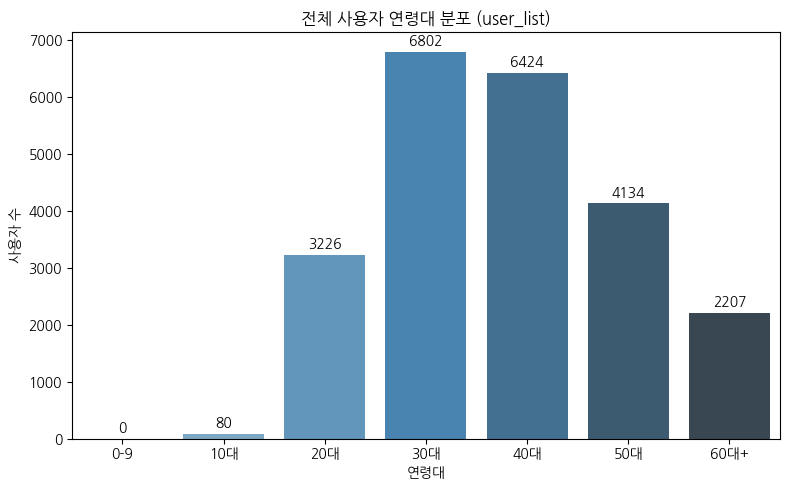

C:\Users\User\AppData\Local\Temp\ipykernel_32152\3828826871.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=sub.index, y=sub.values, palette=["#66c2a5","#fc8d62","#8da0cb","#e78ac3","#a6d854"])


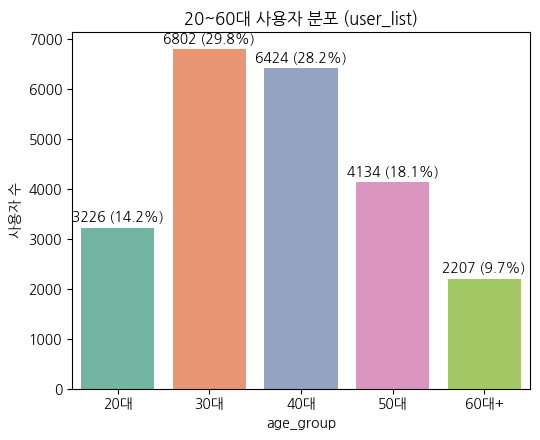

C:\Users\User\AppData\Local\Temp\ipykernel_32152\3828826871.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melted = sub_df.groupby(['age_group', 'gender']).size().reset_index(name='count')


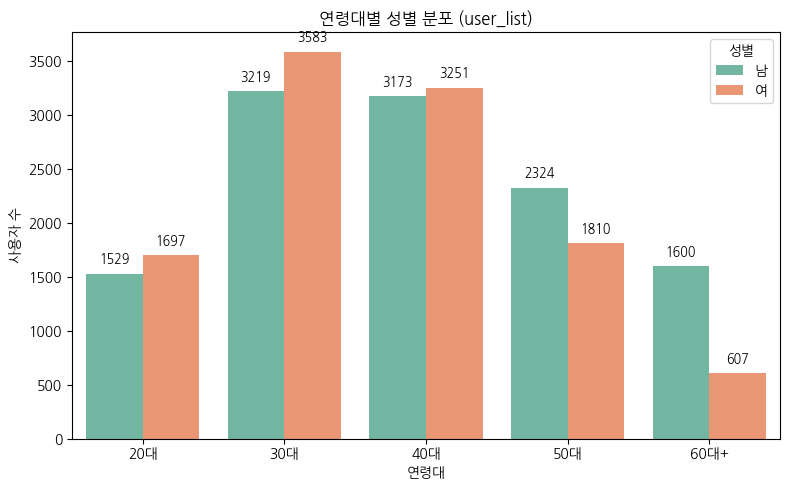

In [35]:
# 불러오기
users = pd.read_csv(USER_FILE)

# 연령대 그룹 생성 (AGE 컬럼 사용)
users['AGE'] = pd.to_numeric(users['AGE'], errors='coerce')
bins = [0, 9, 19, 29, 39, 49, 59, 200]
labels = ['0-9', '10대', '20대', '30대', '40대', '50대', '60대+']
users['age_group'] = pd.cut(users['AGE'], bins=bins, labels=labels, right=True)

# 성별 매핑 (SEX_ID: m/f -> 남/여)
users['gender'] = users['SEX_ID'].astype(str).str.lower().map({'m': '남', 'f': '여'})

# 연령대별 사용자 수 집계 (고유 사용자)
count_by_group = users['age_group'].value_counts().reindex(labels).fillna(0).astype(int)

# 그래프1: 전체 연령대 분포
plt.figure(figsize=(8,5))
ax = sns.barplot(x=count_by_group.index, y=count_by_group.values, hue=count_by_group.index, palette="Blues_d")
plt.title("전체 사용자 연령대 분포 (user_list)")
plt.xlabel("연령대")
plt.ylabel("사용자 수")
for i, v in enumerate(count_by_group.values):
    ax.text(i, v + max(count_by_group.values)*0.01, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# 그래프2: 의미있는 연령대만 강조 (비율 표시)
target_groups = ['20대', '30대', '40대', '50대', '60대+']
sub = count_by_group[target_groups]
total = sub.sum()
plt.figure(figsize=(5.5,4.5))
ax2 = sns.barplot(x=sub.index, y=sub.values, palette=["#66c2a5","#fc8d62","#8da0cb","#e78ac3","#a6d854"])
plt.title("20~60대 사용자 분포 (user_list)")
plt.ylabel("사용자 수")
for i, v in enumerate(sub.values):
    pct = v / total * 100 if total>0 else 0
    ax2.text(i, v + max(sub.values)*0.01, f"{v} ({pct:.1f}%)", ha='center', va='bottom')
plt.tight_layout()
plt.show()

# 그래프3: 연령대별 성별 분포 (그룹형)
genders = ['남', '여']
sub_df = users[users['age_group'].isin(target_groups)].copy()
sub_df = sub_df[sub_df['gender'].isin(genders)]

counts = pd.crosstab(sub_df['age_group'], sub_df['gender']).reindex(index=target_groups, columns=genders, fill_value=0)
melted = sub_df.groupby(['age_group', 'gender']).size().reset_index(name='count')

plt.figure(figsize=(8,5))
ax3 = sns.barplot(
    data=melted,
    x='age_group',
    y='count',
    hue='gender',
    order=target_groups,
    hue_order=genders,
    palette=['#66c2a5', '#fc8d62']
)

ax3.set_title("연령대별 성별 분포 (user_list)")
ax3.set_ylabel("사용자 수")
ax3.set_xlabel("연령대")

totals = counts.sum(axis=1)
max_total = totals.max() if len(totals)>0 else 0
for p in ax3.patches:
    height = p.get_height()
    if height <= 0:
        continue
    x = p.get_x() + p.get_width() / 2
    ax3.text(x, height + max_total*0.01, f"{int(height)}", ha='center', va='bottom', fontsize=9)

plt.legend(title='성별')
plt.tight_layout()
plt.show()

### 유효 사용자 분포

In [29]:
# sns.set(style="whitegrid")

# 1) 데이터 로드
user = pd.read_csv(USER_FILE, encoding='utf-8')
trans = pd.read_csv(TRANS_FILE, encoding='utf-8', parse_dates=['PURCHASED_DATE'], dayfirst=False, infer_datetime_format=True)

# 2) USER_ID_hash 기준 병합 (transaction 기준으로 left join -> 거래에 등장한 사용자)
df = trans.merge(user, on='USER_ID_hash', how='left', suffixes=('_trans', '_user'))

# 3) 연령(age) 컬럼 확보 함수 (여러 포맷 처리)
def infer_age_column(df_user, ref_date=None):
    """
    가능한 경우:
      - 'AGE' 컬럼이 정수로 존재하면 그대로 사용
      - 'BIRTH_DATE' 또는 'BIRTHDAY' 같은 날짜 문자열이 있으면 기준일(ref_date) 기준으로 나이 계산
      - 'DAYS_BIRTH' (예: 음수 일수) 가 있으면 절댓값/365로 변환
    반환: age_series (정수 혹은 NaN)
    """
    # 참조일: transaction의 마지막 날짜(있으면) 또는 오늘
    if ref_date is None:
        try:
            ref_date = df['PURCHASED_DATE'].max()
        except Exception:
            ref_date = pd.to_datetime('today')
    if 'AGE' in df_user.columns:
        age = pd.to_numeric(df_user['AGE'], errors='coerce')
        if age.notna().sum() > 0:
            return age.astype('float')  # 가능하면 float(결측 허용)
    # 생년월일 컬럼 후보들
    for col in ['BIRTH_DATE', 'BIRTHDAY', 'BIRTH_DAY', 'DOB', 'birth_date']:
        if col in df_user.columns:
            try:
                b = pd.to_datetime(df_user[col], errors='coerce', infer_datetime_format=True)
                age = (pd.to_datetime(ref_date) - b).dt.days // 365
                return age.astype('float')
            except Exception:
                pass
    # DAYS_BIRTH 같은 경우 (예: -12000)
    for col in ['DAYS_BIRTH', 'days_birth']:
        if col in df_user.columns:
            try:
                d = pd.to_numeric(df_user[col], errors='coerce')
                # 음수로 되어 있을 가능성 -> 절댓값
                age = (d.abs() / 365.25)
                return age.astype('float')
            except Exception:
                pass
    # 없으면 NaN 시리즈 반환
    return pd.Series([np.nan] * len(df_user), index=df_user.index)

# user dataset에서 age_series 얻기 (병합된 df의 user쪽 컬럼 사용 가능)
age_series = infer_age_column(df)

# 만약 infer_age_column이 병합된 df 기준으로 계산이 안되었으면 user 기준으로 다시 시도
if age_series.isna().all():
    age_series = infer_age_column(user)
    # 병합 df에 매칭해서 넣기: user의 USER_ID_hash 기준으로 map
    if 'USER_ID_hash' in user.columns:
        age_map = user['USER_ID_hash'].astype(str).to_frame().set_index('USER_ID_hash')
        # ensure age_map aligned
        age_map = user.set_index('USER_ID_hash')[age_series.name if hasattr(age_series, "name") and age_series.name in user.columns else user.columns[0:0]]
    # 간단 매핑:
    age_map = pd.Series(age_series.values, index=user['USER_ID_hash'])
    df['AGE_inferred'] = df['USER_ID_hash'].map(age_map).astype('float')
else:
    df['AGE_inferred'] = age_series.values

# 위에서 제대로 채워졌는지 체크
if df['AGE_inferred'].isna().all():
    raise ValueError("연령 정보를 찾지 못했습니다. user_list 파일 안의 AGE 또는 생년월일(BIRTH_DATE 등) 컬럼명을 확인해주세요.")

# 4) 연령대 그룹을 만든다 (10대~60대+)
bins = [0, 9, 19, 29, 39, 49, 59, 200]
labels = ['0-9', '10대', '20대', '30대', '40대', '50대', '60대+']
df['age_group'] = pd.cut(df['AGE_inferred'], bins=bins, labels=labels, right=True)

# 5) "사용자 분포"는 중복 사용자 제거 후 집계한다 (unique users)
unique_users = df[['USER_ID_hash', 'AGE_inferred', 'age_group']].drop_duplicates(subset='USER_ID_hash')

# Count users per age_group
count_by_group = unique_users['age_group'].value_counts().reindex(labels).fillna(0).astype(int)

print(df)

C:\Users\User\AppData\Local\Temp\ipykernel_37972\690846512.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  trans = pd.read_csv(TRANS_FILE, encoding='utf-8', parse_dates=['PURCHASED_DATE'], dayfirst=False, infer_datetime_format=True)


        ITEM_COUNT      PURCHASED_DATE SMALL_AREA_NAME  \
0                1 2012-03-28 15:06:00              兵庫   
1                1 2011-07-04 23:52:00     銀座・新橋・東京・上野   
2                1 2011-07-16 00:52:00       恵比寿・目黒・品川   
3                1 2011-07-16 00:54:00       恵比寿・目黒・品川   
4                1 2011-07-16 00:55:00       恵比寿・目黒・品川   
...            ...                 ...             ...   
168991           1 2012-02-07 12:14:00       池袋・神楽坂・赤羽   
168992           1 2012-02-28 15:43:00     銀座・新橋・東京・上野   
168993           1 2012-03-19 12:11:00     銀座・新橋・東京・上野   
168994           2 2012-04-12 12:27:00  新宿・高田馬場・中野・吉祥寺   
168995           1 2012-05-09 12:12:00  新宿・高田馬場・中野・吉祥寺   

                         PURCHASEID_hash                      USER_ID_hash  \
0       c820a8882374a4e472f0984a8825893f  d9dca3cb44bab12ba313eaa681f663eb   
1       1b4eb2435421ede98c8931c42e8220ec  560574a339f1b25e57b0221e486907ed   
2       36b5f9ba46c44b65587d0b16f2e4c77f  560574a339f1b25e57b0221e486

C:\Users\User\AppData\Local\Temp\ipykernel_37972\3035413049.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=count_by_group.index, y=count_by_group.values, palette="Blues_d")


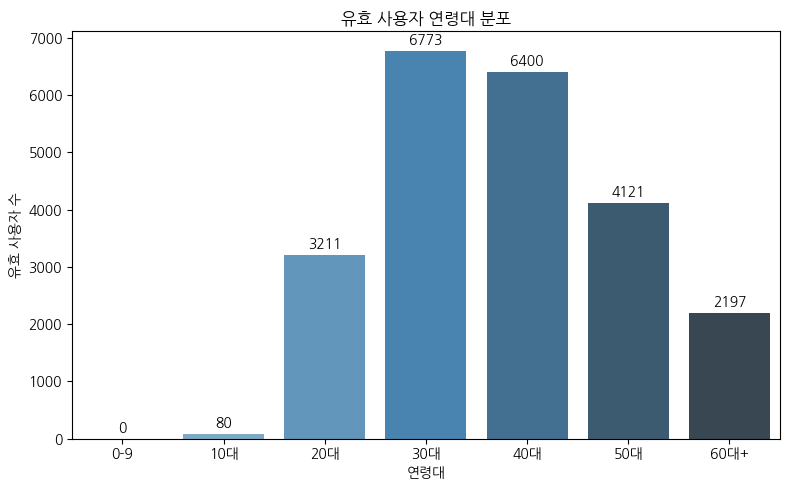

C:\Users\User\AppData\Local\Temp\ipykernel_37972\3035413049.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=sub.index, y=sub.values, palette=["#66c2a5","#fc8d62","#8da0cb","#e78ac3","#a6d854"])


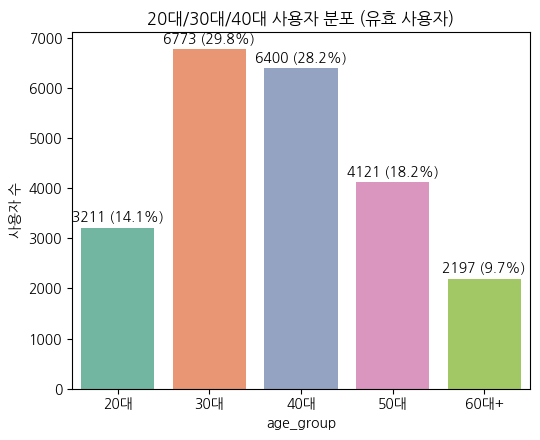

C:\Users\User\AppData\Local\Temp\ipykernel_37972\3035413049.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melted = sub_df.groupby(['age_group', 'gender']).size().reset_index(name='count')


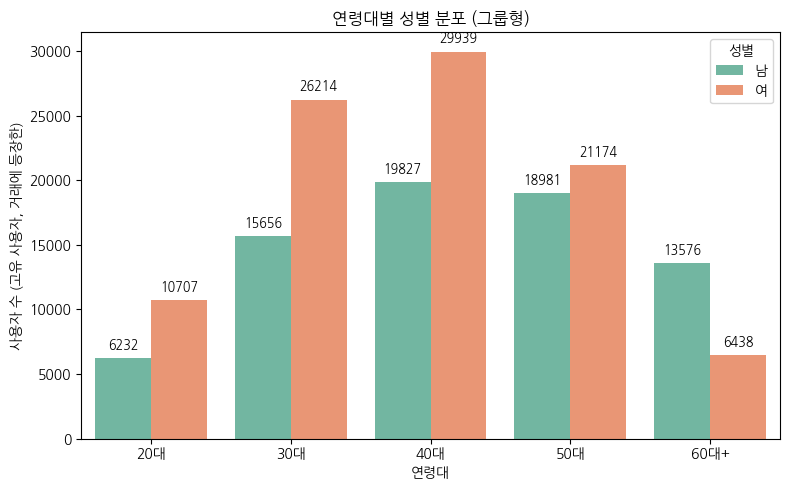

In [30]:
# 연령대 별 유저 분포 시각화
plt.figure(figsize=(8,5))
ax = sns.barplot(x=count_by_group.index, y=count_by_group.values, palette="Blues_d")
plt.title("유효 사용자 연령대 분포")
plt.xlabel("연령대")
plt.ylabel("유효 사용자 수")
for i, v in enumerate(count_by_group.values):
    ax.text(i, v + max(count_by_group.values)*0.01, str(v), ha='center', va='bottom')
plt.tight_layout()
# plt.savefig("age_group_distribution.png", dpi=150)
plt.show()

# 의미있는 연령대 만을 강조한 막대 그래프 (비율 표시)
target_groups = ['20대', '30대', '40대', '50대', '60대+']
sub = count_by_group[target_groups]
total = sub.sum()
plt.figure(figsize=(5.5,4.5))
ax2 = sns.barplot(x=sub.index, y=sub.values, palette=["#66c2a5","#fc8d62","#8da0cb","#e78ac3","#a6d854"])
plt.title("20대/30대/40대 사용자 분포 (유효 사용자)")
plt.ylabel("사용자 수")
for i, v in enumerate(sub.values):
    pct = v / total * 100 if total>0 else 0
    ax2.text(i, v + max(sub.values)*0.01, f"{v} ({pct:.1f}%)", ha='center', va='bottom')
plt.tight_layout()
plt.savefig("age_distribution.png", dpi=150)
plt.show()

# 의미있는 연령대에 성별(남/여) 그룹형 막대 그래프
# SEX_ID 컬럼(m/f)을 '남'/'여'로 매핑하고, target 연령대만 뽑아 시각화
genders = ['남', '여']

# SEX_ID -> gender 컬럼 생성 (대소문자/결측 처리)
df['gender'] = df.get('SEX_ID', df.get('SEX', df.get('sex', pd.Series([], dtype=str)))).astype(str).str.lower().map({'m': '남', 'f': '여'})
# 결측/알수없음 제거
sub_df = df[df['age_group'].isin(target_groups)].copy()
sub_df = sub_df[sub_df['gender'].isin(genders)]

# 교차표(연령대 x 성별) 및 melt용 집계
counts = pd.crosstab(sub_df['age_group'], sub_df['gender']).reindex(index=target_groups, columns=genders, fill_value=0)
melted = sub_df.groupby(['age_group', 'gender']).size().reset_index(name='count')

# 그룹형 막대 (연령대별로 남/여 옆으로 비교)
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=melted,
    x='age_group',
    y='count',
    hue='gender',
    order=target_groups,
    hue_order=genders,
    palette=['#66c2a5', '#fc8d62']
)

ax.set_title("연령대별 성별 분포 (그룹형)")
ax.set_ylabel("사용자 수 (고유 사용자, 거래에 등장한)")
ax.set_xlabel("연령대")

# 각 바 위에 값 표시
totals = counts.sum(axis=1)
max_total = totals.max() if len(totals)>0 else 0
for p in ax.patches:
    height = p.get_height()
    if height <= 0:
        continue
    x = p.get_x() + p.get_width() / 2
    ax.text(x, height + max_total*0.01, f"{int(height)}", ha='center', va='bottom', fontsize=9)

plt.legend(title='성별')
plt.tight_layout()
plt.savefig("age_gender_grouped.png", dpi=150)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_37972\2802066372.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=['#66c2a5','#fc8d62'])


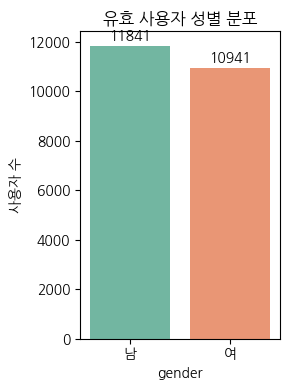

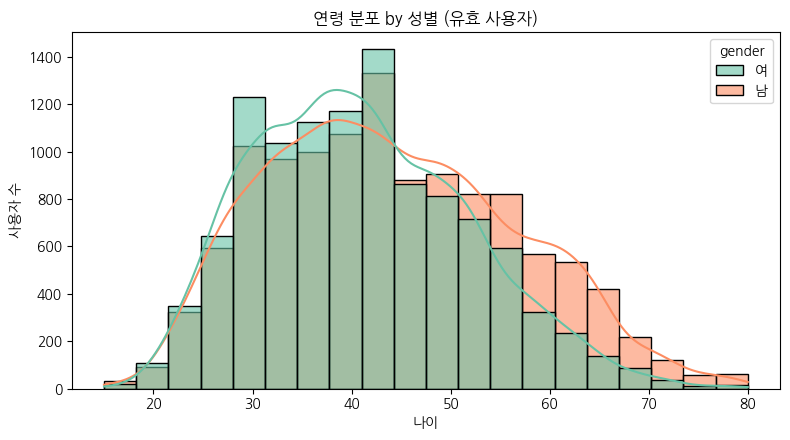

In [31]:
# (새 셀) 연령(AGE_inferred) 기준 남/여 분포 시각화 (연령대 무시)
# unique_users는 이전 셀에서 이미 생성되어 있다고 가정. 없으면 df 기준으로 고유 사용자 추출
try:
    users_vis = unique_users.copy()
except NameError:
    users_vis = df[['USER_ID_hash','AGE_inferred']].drop_duplicates('USER_ID_hash').copy()

# 성별 컬럼 보장 (SEX_ID/SEX/sex -> '남'/'여')
users_vis['gender'] = df.get('SEX_ID', df.get('SEX', df.get('sex', pd.Series([], dtype=str)))).astype(str).str.lower().map({'m':'남','f':'여'})
# 위 매핑이 실패하면 user 테이블에서 채워보기
if users_vis['gender'].isna().all() and 'SEX_ID' in user.columns:
    users_vis = users_vis.merge(user[['USER_ID_hash','SEX_ID']], on='USER_ID_hash', how='left')
    users_vis['gender'] = users_vis['SEX_ID'].astype(str).str.lower().map({'m':'남','f':'여'})

# 정리: 연령 숫자, 성별 필터링
users_vis['AGE_inferred'] = pd.to_numeric(users_vis['AGE_inferred'], errors='coerce')
users_vis = users_vis.dropna(subset=['AGE_inferred'])
users_vis = users_vis[users_vis['gender'].isin(['남','여'])].copy()

# 전체 성별 카운트 (간단 막대)
plt.figure(figsize=(3,4))
gender_counts = users_vis['gender'].value_counts().reindex(['남','여']).fillna(0).astype(int)
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=['#66c2a5','#fc8d62'])
ax.set_title("유효 사용자 성별 분포")
ax.set_ylabel("사용자 수")
for i,v in enumerate(gender_counts.values):
    ax.text(i, v + max(gender_counts.values)*0.01, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.savefig("active_user_by_age.png", dpi=150)
plt.show()

# 나이 분포 히스토그램 + KDE (남/여 겹쳐서 비교)
plt.figure(figsize=(8,4.5))
sns.histplot(data=users_vis, x='AGE_inferred', hue='gender', bins=20, stat='count',
             kde=True, palette=['#66c2a5','#fc8d62'], alpha=0.6)
plt.title("연령 분포 by 성별 (유효 사용자)")
plt.xlabel("나이")
plt.ylabel("사용자 수")
plt.tight_layout()
# plt.savefig("active_user_by_age_and_gender.png", dpi=150)
plt.show()

### 데이터 내 유효 사용자 전체 사용자 비교

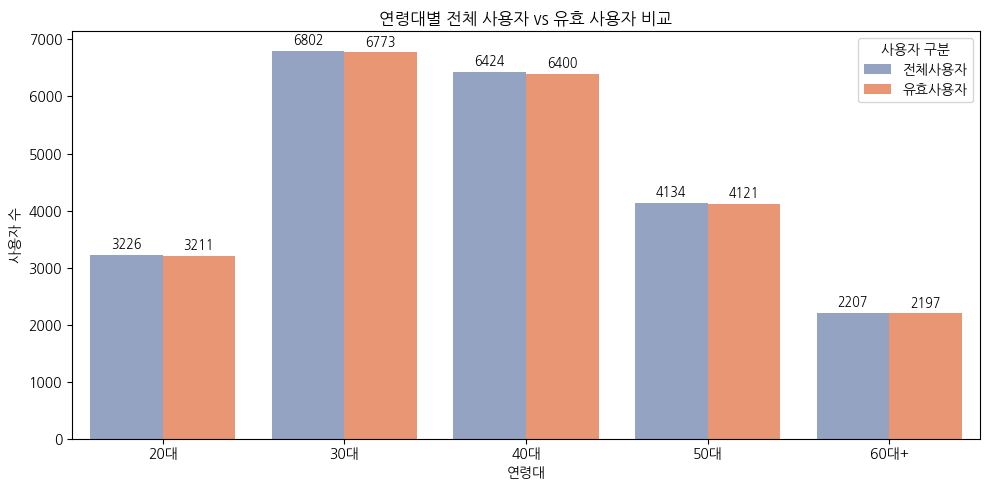


=== 연령대별 유효사용자 비율 ===
20대: 99.5% (3,211명 / 3,226명)
30대: 99.6% (6,773명 / 6,802명)
40대: 99.6% (6,400명 / 6,424명)
50대: 99.7% (4,121명 / 4,134명)
60대+: 99.5% (2,197명 / 2,207명)


In [32]:
# 전체 사용자 vs 유효 사용자 연령대별 비교 (그룹형)

# 1) 전체 사용자 (user_list) - 이미 셀2에서 로드됨
# users 데이터프레임 재사용 (없으면 다시 로드)
try:
    users_total = users.copy()
except NameError:
    users_total = pd.read_csv(USER_FILE)
    users_total['AGE'] = pd.to_numeric(users_total['AGE'], errors='coerce')
    bins = [0, 9, 19, 29, 39, 49, 59, 200]
    labels = ['0-9', '10대', '20대', '30대', '40대', '50대', '60대+']
    users_total['age_group'] = pd.cut(users_total['AGE'], bins=bins, labels=labels, right=True)

# 2) 유효 사용자 (거래 발생) - unique_users 재사용
# unique_users는 이미 셀4에서 생성됨

# 3) 연령대별 집계
total_count = users_total['age_group'].value_counts().reindex(labels).fillna(0).astype(int)
valid_count = unique_users['age_group'].value_counts().reindex(labels).fillna(0).astype(int)

# 4) 의미있는 연령대만 선택
target_groups = ['20대', '30대', '40대', '50대', '60대+']
comparison_df = pd.DataFrame({
    '사용자구분': ['전체사용자']*len(target_groups) + ['유효사용자']*len(target_groups),
    '연령대': target_groups * 2,
    '사용자수': list(total_count[target_groups].values) + list(valid_count[target_groups].values)
})

# 5) 그룹형 막대 그래프
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=comparison_df,
    x='연령대',
    y='사용자수',
    hue='사용자구분',
    order=target_groups,
    hue_order=['전체사용자', '유효사용자'],
    palette=['#8da0cb', '#fc8d62']
)

ax.set_title("연령대별 전체 사용자 vs 유효 사용자 비교")
ax.set_ylabel("사용자 수")
ax.set_xlabel("연령대")

# 각 바 위에 값 표시
for p in ax.patches:
    height = p.get_height()
    if height <= 0:
        continue
    x = p.get_x() + p.get_width() / 2
    ax.text(x, height + max(comparison_df['사용자수'])*0.01, 
            f"{int(height)}", ha='center', va='bottom', fontsize=9)

plt.legend(title='사용자 구분', loc='upper right')
plt.tight_layout()
plt.savefig("user_active_comparison.png", dpi=150)
plt.show()

# 6) 유효사용자 비율 표시
conversion_rates = (valid_count[target_groups] / total_count[target_groups] * 100).fillna(0)
print("\n=== 연령대별 유효사용자 비율 ===")
for age, rate in conversion_rates.items():
    print(f"{age}: {rate:.1f}% ({valid_count[age]:,}명 / {total_count[age]:,}명)")

C:\Users\User\AppData\Local\Temp\ipykernel_37972\3387492164.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=user_purchase, x='age_group', y='구매건수',


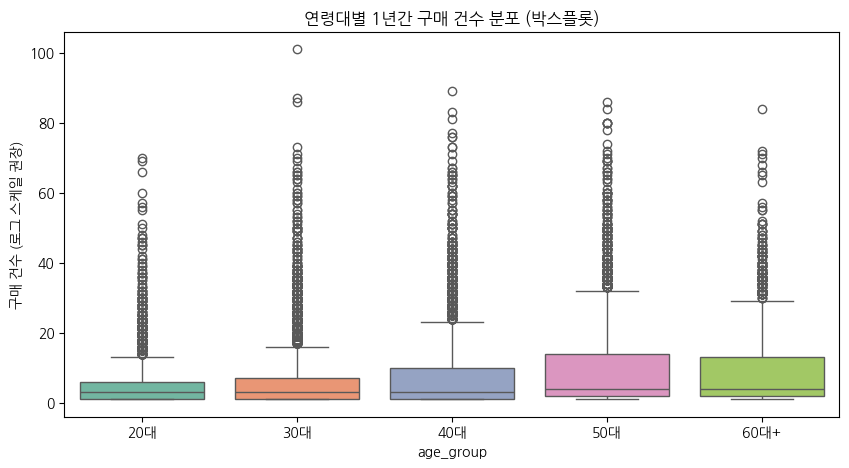

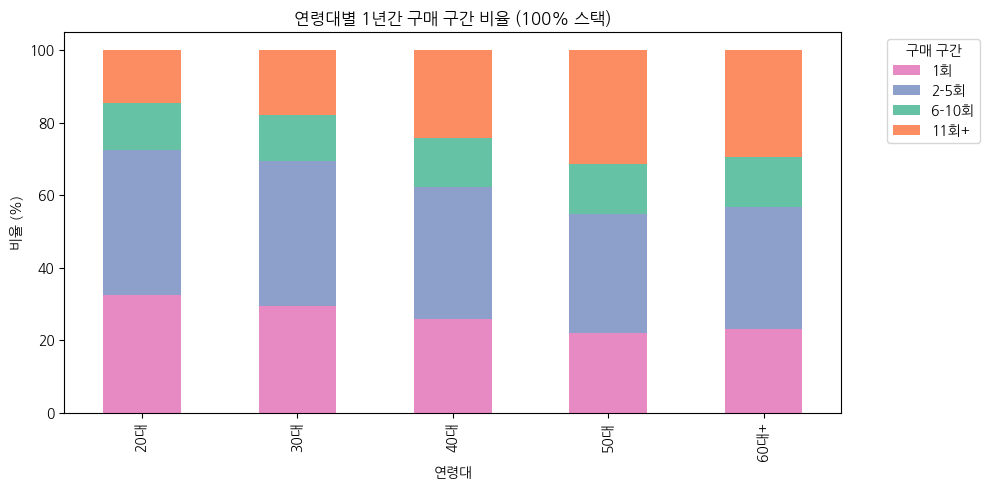

In [33]:
# 사용자별 구매 건수 집계
user_purchase_count = df.groupby('USER_ID_hash').size().reset_index(name='구매건수')
user_purchase = user_purchase_count.merge(
    unique_users[['USER_ID_hash','age_group']], 
    on='USER_ID_hash'
)

# 1) 박스플롯: 연령대별 구매 건수 분포
plt.figure(figsize=(10,5))
sns.boxplot(data=user_purchase, x='age_group', y='구매건수', 
            order=target_groups, palette='Set2')
plt.title("연령대별 1년간 구매 건수 분포 (박스플롯)")
plt.ylabel("구매 건수 (로그 스케일 권장)")
# plt.yscale('log')  # 이상치 많으면 로그 스케일
plt.savefig("age_purchase_boxplot.png", dpi=150)
plt.show()

# 2) 구매 구간 분류 (1회, 2-5, 6-10, 11+)
bins_purchase = [0, 1, 5, 10, 999]
labels_purchase = ['1회', '2-5회', '6-10회', '11회+']
user_purchase['구매구간'] = pd.cut(
    user_purchase['구매건수'], 
    bins=bins_purchase, 
    labels=labels_purchase, 
    right=True
)

# 3) 100% 스택형 막대: 연령대별 구매구간 비율
crosstab = pd.crosstab(
    user_purchase['age_group'], 
    user_purchase['구매구간'], 
    normalize='index'  # 행 기준 비율
) * 100

crosstab.loc[target_groups].plot(
    kind='bar', 
    stacked=True, 
    figsize=(10,5),
    color=['#e78ac3','#8da0cb','#66c2a5','#fc8d62']
)
plt.title("연령대별 1년간 구매 구간 비율 (100% 스택)")
plt.ylabel("비율 (%)")
plt.xlabel("연령대")
plt.legend(title='구매 구간', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig("age_purchase_segment.png", dpi=150)
plt.show()

### 연령대별 구매력 (중앙값 vs 평균)

In [16]:
coupon_list = pd.read_csv(COUPON_FILE)  # 쿠폰 정보 (금액)
coupon_trans = pd.read_csv(TRANS_FILE)  # 구매 내역
user_list = pd.read_csv(USER_FILE)  # 사용자 정보

# 3-way 병합: transaction을 기준으로
df_integrated = coupon_trans.merge(
    coupon_list[['COUPON_ID_hash', 'DISCOUNT_PRICE', 'CATALOG_PRICE', 'PRICE_RATE']], 
    on='COUPON_ID_hash', 
    how='left'
).merge(
    user_list[['USER_ID_hash', 'SEX_ID', 'AGE']], 
    on='USER_ID_hash', 
    how='left'
)

# 연령대 생성
df_integrated['AGE'] = pd.to_numeric(df_integrated['AGE'], errors='coerce')
bins = [0, 9, 19, 29, 39, 49, 59, 200]
labels = ['0-9', '10대', '20대', '30대', '40대', '50대', '60대+']
df_integrated['age_group'] = pd.cut(df_integrated['AGE'], bins=bins, labels=labels, right=True)

# 성별 매핑
df_integrated['gender'] = df_integrated['SEX_ID'].astype(str).str.lower().map({'m': '남', 'f': '여'})

# 실제 구매금액 = DISCOUNT_PRICE × ITEM_COUNT
df_integrated['실제구매금액'] = df_integrated['DISCOUNT_PRICE'] * df_integrated['ITEM_COUNT']

print(f"총 거래 건수: {len(df_integrated):,}건")
print(f"통합 데이터 컬럼: {list(df_integrated.columns)}")
print(f"\n=== 샘플 데이터 ===")
print(df_integrated[['USER_ID_hash', 'COUPON_ID_hash', 'DISCOUNT_PRICE', 'age_group', 'gender']].head())

총 거래 건수: 168,996건
통합 데이터 컬럼: ['ITEM_COUNT', 'PURCHASED_DATE', 'SMALL_AREA_NAME', 'PURCHASEID_hash', 'USER_ID_hash', 'COUPON_ID_hash', 'DISCOUNT_PRICE', 'CATALOG_PRICE', 'PRICE_RATE', 'SEX_ID', 'AGE', 'age_group', 'gender', '실제구매금액']

=== 샘플 데이터 ===
                       USER_ID_hash                    COUPON_ID_hash  \
0  d9dca3cb44bab12ba313eaa681f663eb  34c48f84026e08355dc3bd19b427f09a   
1  560574a339f1b25e57b0221e486907ed  767673b7a777854a92b73b0934ddfae7   
2  560574a339f1b25e57b0221e486907ed  4f3b5b91d9831192557c056022fdc1f2   
3  560574a339f1b25e57b0221e486907ed  4f3b5b91d9831192557c056022fdc1f2   
4  560574a339f1b25e57b0221e486907ed  4f3b5b91d9831192557c056022fdc1f2   

   DISCOUNT_PRICE age_group gender  
0            1575       20대      여  
1            1680       30대      여  
2             160       30대      여  
3             160       30대      여  
4             160       30대      여  


In [17]:
target_groups = ['20대', '30대', '40대', '50대', '60대+']

# 사용자별 총 구매금액 집계
user_spending = df_integrated.groupby('USER_ID_hash').agg({
    '실제구매금액': 'sum',  # 총 구매금액
    'age_group': 'first',     # 연령대
    'gender': 'first'          # 성별
}).reset_index()
user_spending.columns = ['USER_ID_hash', '총구매금액', 'age_group', 'gender']

# 연령대별 통계 (중앙값 vs 평균)
age_spending_stats = user_spending.groupby('age_group')['총구매금액'].agg([
    ('중앙값', 'median'),
    ('평균', 'mean'),
    ('사용자수', 'count')
]).reset_index()
age_spending_stats = age_spending_stats[age_spending_stats['age_group'].isin(target_groups)]

print("=== 연령대별 구매금액 통계 ===")
print(age_spending_stats.to_string(index=False))

=== 연령대별 구매금액 통계 ===
age_group     중앙값           평균  사용자수
      20대  5490.0 16495.285581  3211
      30대  5610.0 18699.177322  6773
      40대  8700.0 26203.183906  6400
      50대 14674.0 38389.342393  4121
     60대+ 15750.0 42816.624033  2197


C:\Users\User\AppData\Local\Temp\ipykernel_37972\112249486.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending_stats = user_spending.groupby('age_group')['총구매금액'].agg([


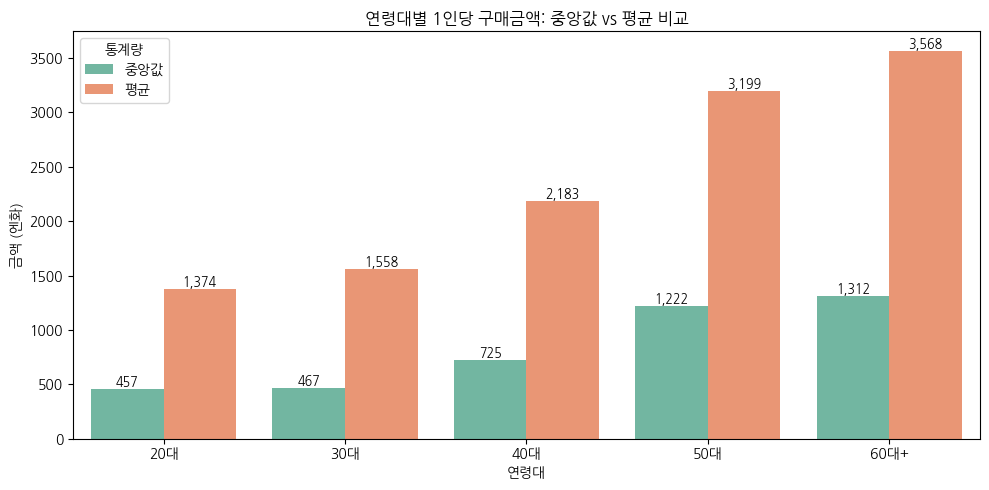


=== 평균-중앙값 차이 분석 ===
(차이가 클수록 outlier 영향이 큼)
연령대     중앙값      평균    차이(%)
20대         457       1,374    200
30대         467       1,558    233
40대         725       2,183    201
50대       1,222       3,199    161
60대+      1,312       3,568    171


'\n<8: 왼쪽 정렬, 8칸\n>8: 오른쪽 정렬, 8칸\n,: 천 단위 구분 쉼표\n'

In [18]:
# 평균과 중앙값 차이 비율 계산
age_spending_stats['차이비율(%)'] = (
    (age_spending_stats['평균'] - age_spending_stats['중앙값']) 
    / age_spending_stats['중앙값'] * 100
)
# 정수 변환
age_spending_stats['중앙값'] = (age_spending_stats['중앙값']/12).astype(int)
age_spending_stats['평균'] = (age_spending_stats['평균']/12).astype(int)
age_spending_stats['차이비율(%)'] = (
    (age_spending_stats['평균'] - age_spending_stats['중앙값']) 
    / age_spending_stats['중앙값'] * 100
).astype(int)

# 시각화: 중앙값 vs 평균 비교
melted_stats = age_spending_stats.melt(
    id_vars='age_group', 
    value_vars=['중앙값', '평균'],
    var_name='통계량', 
    value_name='금액'
)

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=melted_stats, 
    x='age_group', 
    y='금액', 
    hue='통계량',
    order=target_groups, 
    palette=['#66c2a5', '#fc8d62']
)

ax.set_title("연령대별 1인당 구매금액: 중앙값 vs 평균 비교")
ax.set_ylabel("금액 (엔화)")
ax.set_xlabel("연령대")

# 값 표시
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width()/2, 
            height,
            f'{int(height):,}', 
            ha='center', 
            va='bottom', 
            fontsize=9
        )

plt.legend(title='통계량')
plt.tight_layout()
plt.savefig("age_purchase_power.png", dpi=150)
# plt.savefig()는 plt.show() 바로 직전에 호출해야 합니다!
plt.show()

print("\n=== 평균-중앙값 차이 분석 ===")
print("(차이가 클수록 outlier 영향이 큼)")
display_df = age_spending_stats[['age_group', '중앙값', '평균', '차이비율(%)']].copy()
display_df.columns = ['연령대', '중앙값', '평균', '차이(%)']  # 짧은 컬럼명으로 변경
print(f"{'연령대':<6} {'중앙값':>4} {'평균':>7} {'차이(%)':>8}")
for _, row in display_df.iterrows():
    print(f"{row['연령대']:<6} {row['중앙값']:>8,} {row['평균']:>11,} {row['차이(%)']:>6}")


'''
<8: 왼쪽 정렬, 8칸
>8: 오른쪽 정렬, 8칸
,: 천 단위 구분 쉼표
'''

C:\Users\User\AppData\Local\Temp\ipykernel_37972\1904368814.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aov_stats = df_integrated.groupby('age_group')['건당금액'].agg([


=== 연령대별 건당 구매금액 통계 ===
age_group  건당중앙값        건당평균  거래건수
      20대 1800.0 3126.888364 16939
      30대 1700.0 3024.827514 41870
      40대 1960.0 3369.778102 49766
      50대 2000.0 3939.795293 40155
     60대+ 2400.0 4700.116069 20014


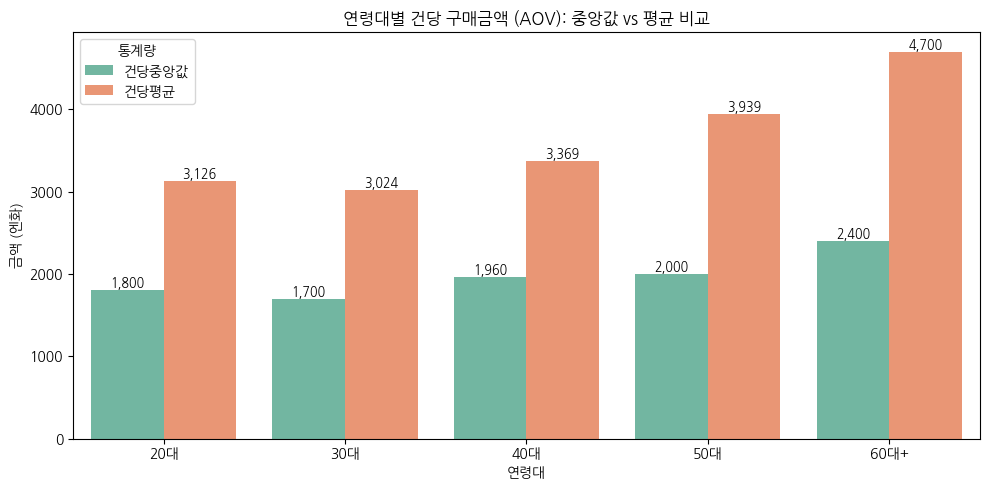


=== 건당 평균-중앙값 차이 분석 ===
연령대       건당중앙값    건당평균     차이(%)     거래건수
20대         1,800¥        3,127¥         73%       16,939건
30대         1,700¥        3,025¥         77%       41,870건
40대         1,960¥        3,370¥         71%       49,766건
50대         2,000¥        3,940¥         96%       40,155건
60대+        2,400¥        4,700¥         95%       20,014건


In [27]:
df_integrated['건당금액'] = df_integrated['실제구매금액']  # 이미 DISCOUNT_PRICE × ITEM_COUNT

# 연령대별 건당 평균
aov_stats = df_integrated.groupby('age_group')['건당금액'].agg([
    ('건당중앙값', 'median'),
    ('건당평균', 'mean'),
    ('거래건수', 'count')
]).reset_index()

# target_groups 필터링
aov_stats = aov_stats[aov_stats['age_group'].isin(target_groups)]

print("=== 연령대별 건당 구매금액 통계 ===")
print(aov_stats.to_string(index=False))

# 시각화용 데이터 준비
melted_aov = aov_stats.melt(
    id_vars='age_group', 
    value_vars=['건당중앙값', '건당평균'],
    var_name='통계량', 
    value_name='금액'
)

# 그래프 그리기
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=melted_aov, 
    x='age_group', 
    y='금액', 
    hue='통계량',
    order=target_groups, 
    palette=['#66c2a5', '#fc8d62']
)

ax.set_title("연령대별 건당 구매금액 (AOV): 중앙값 vs 평균 비교")
ax.set_ylabel("금액 (엔화)")
ax.set_xlabel("연령대")

# 값 표시
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width()/2, 
            height,
            f'{int(height):,}', 
            ha='center', 
            va='bottom', 
            fontsize=9
        )

plt.legend(title='통계량')
plt.tight_layout()
plt.savefig("age_purchase_aov.png", dpi=150)
plt.show()

# 차이 분석
aov_stats['차이비율(%)'] = (
    (aov_stats['건당평균'] - aov_stats['건당중앙값']) 
    / aov_stats['건당중앙값'] * 100
).astype(int)

print("\n=== 건당 평균-중앙값 차이 분석 ===")
display_df = aov_stats[['age_group', '건당중앙값', '건당평균', '차이비율(%)', '거래건수']].copy()
display_df.columns = ['연령대', '건당중앙값', '건당평균', '차이(%)', '거래건수']
print(f"{'연령대':<6} {'건당중앙값':>8} {'건당평균':>7} {'차이(%)':>9} {'거래건수':>8}")
for _, row in display_df.iterrows():
    print(f"{row['연령대']:<6} {row['건당중앙값']:>10,.0f}¥ {row['건당평균']:>12,.0f}¥ {row['차이(%)']:>10}% {row['거래건수']:>12,}건")

### 시간대별 구매력
* 점심과 자기전에 급등
* 

총 방문 기록: 2,833,180건
컬럼: ['PURCHASE_FLG', 'I_DATE', 'PAGE_SERIAL', 'REFERRER_hash', 'VIEW_COUPON_ID_hash', 'USER_ID_hash', 'SESSION_ID_hash', 'PURCHASEID_hash']

연령대 정보가 있는 방문 기록: 2,833,180건
고유 사용자 수: 22,805명

중복 제거 후 (사용자-시간대 고유 조합): 205,156건

=== 연령대별 시간대 방문 패턴 (순 방문자 수) ===
hour         0     1    2    3    4    5    6     7     8     9   ...    14  \
age_group                                                         ...         
20대        1109   806  476  303  166  134  204   301   516   694  ...  1103   
30대        2439  1611  967  633  423  406  623   977  1513  2072  ...  2954   
40대        2404  1561  980  606  469  536  849  1339  2028  2599  ...  3326   
50대        1603  1053  645  429  370  455  703  1107  1699  2016  ...  2458   
60대+        667   397  252  205  195  273  423   592   902  1170  ...  1394   

hour         15    16    17    18    19    20    21    22    23  
age_group                                                        
20대        1099  1117  1167  1151  11

C:\Users\User\AppData\Local\Temp\ipykernel_10920\255295746.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_visits = visit_dedup.groupby(['age_group', 'hour']).size().reset_index(name='순방문자수')


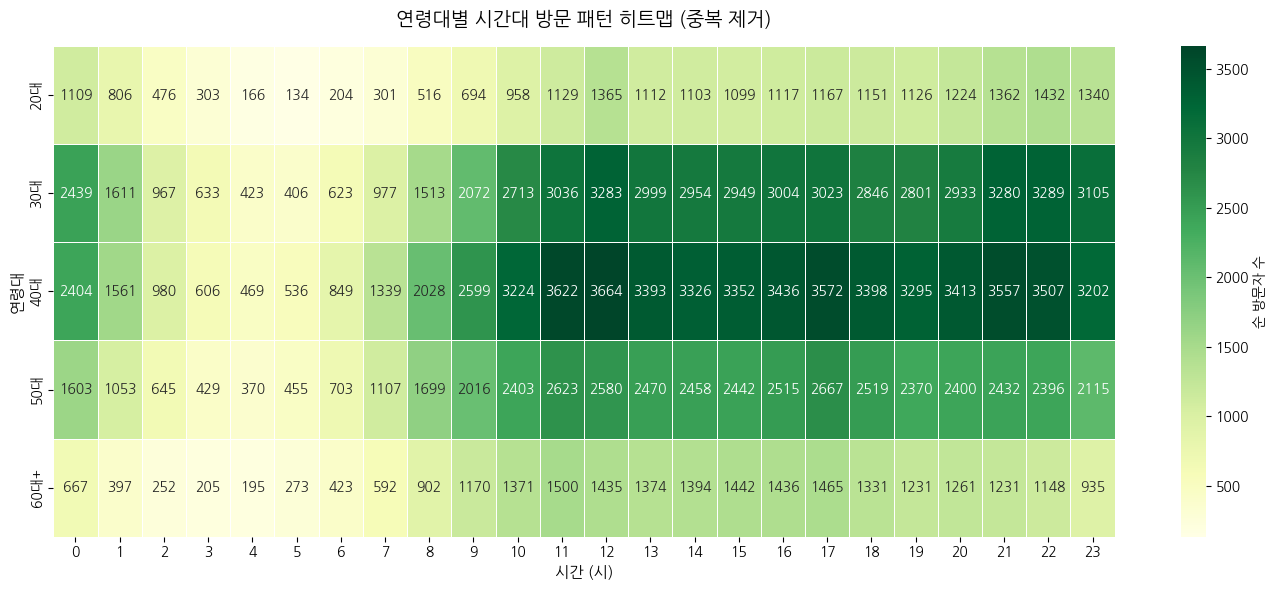


=== 연령대별 피크 시간대 ===
20대: 22시 (순방문자 1,432명, 하루 총 21,394명)
30대: 22시 (순방문자 3,289명, 하루 총 53,879명)
40대: 12시 (순방문자 3,664명, 하루 총 61,332명)
50대: 17시 (순방문자 2,667명, 하루 총 44,470명)
60대+: 11시 (순방문자 1,500명, 하루 총 23,630명)


In [2]:
# 히트맵(연령대 시간대별 클릭/ 순 방문자 수): 1인당 동일 시간대 클릭수 중복제거

# 1) coupon_visit 데이터 로드
visit_df = pd.read_csv(VISIT_FILE, parse_dates=['I_DATE'])
user_list = pd.read_csv(USER_FILE)

print(f"총 방문 기록: {len(visit_df):,}건")
print(f"컬럼: {list(visit_df.columns)}")

# 2) user_list와 병합하여 연령대 정보 추가
visit_with_user = visit_df.merge(
    user_list[['USER_ID_hash', 'AGE', 'SEX_ID']], 
    on='USER_ID_hash', 
    how='left'
)

# 연령대 생성
visit_with_user['AGE'] = pd.to_numeric(visit_with_user['AGE'], errors='coerce')
bins = [0, 9, 19, 29, 39, 49, 59, 200]
labels = ['0-9', '10대', '20대', '30대', '40대', '50대', '60대+']
visit_with_user['age_group'] = pd.cut(visit_with_user['AGE'], bins=bins, labels=labels, right=True)

# 3) 시간(hour) 추출
visit_with_user['hour'] = visit_with_user['I_DATE'].dt.hour

# 4) 결측치 제거 (연령대 정보 없는 경우)
visit_with_user = visit_with_user.dropna(subset=['age_group'])

print(f"\n연령대 정보가 있는 방문 기록: {len(visit_with_user):,}건")
print(f"고유 사용자 수: {visit_with_user['USER_ID_hash'].nunique():,}명")

# 5) 중복 제거: 동일 사용자가 동일 시간대에 여러 번 방문해도 1회로 계산
# 방법 수정: drop_duplicates 사용
visit_dedup = visit_with_user[['USER_ID_hash', 'age_group', 'hour']].drop_duplicates()

print(f"\n중복 제거 후 (사용자-시간대 고유 조합): {len(visit_dedup):,}건")

# 6) 연령대 × 시간대 집계 (순 방문자 수)
hourly_visits = visit_dedup.groupby(['age_group', 'hour']).size().reset_index(name='순방문자수')

# 7) 피벗 테이블 생성 (히트맵용)
heatmap_data = hourly_visits.pivot(index='age_group', columns='hour', values='순방문자수').fillna(0)

# target_groups 순서로 재정렬
target_groups = ['20대', '30대', '40대', '50대', '60대+']
heatmap_data = heatmap_data.reindex(target_groups)

print("\n=== 연령대별 시간대 방문 패턴 (순 방문자 수) ===")
print(heatmap_data)

# 8) 히트맵 시각화
plt.figure(figsize=(14, 6))
ax = sns.heatmap(
    heatmap_data, 
    cmap='YlGn',  # 노랑-주황-빨강 색상
    annot=True,      # 숫자 표시
    fmt='.0f',       # 정수로 표시
    cbar_kws={'label': '순 방문자 수'},
    linewidths=0.5,
    linecolor='white'
)

ax.set_title("연령대별 시간대 방문 패턴 히트맵 (중복 제거)", fontsize=14, pad=15)
ax.set_xlabel("시간 (시)", fontsize=11)
ax.set_ylabel("연령대", fontsize=11)
ax.set_xticklabels(range(24), rotation=0)

plt.tight_layout()
plt.savefig("age_hour_heatmap_unique.png", dpi=150, bbox_inches='tight')
plt.show()

# 9) 통계 요약
print("\n=== 연령대별 피크 시간대 ===")
for age_group in target_groups:
    if age_group in heatmap_data.index:
        peak_hour = heatmap_data.loc[age_group].idxmax()
        peak_count = heatmap_data.loc[age_group].max()
        total_visits = heatmap_data.loc[age_group].sum()
        print(f"{age_group}: {int(peak_hour):02d}시 (순방문자 {int(peak_count):,}명, 하루 총 {int(total_visits):,}명)")

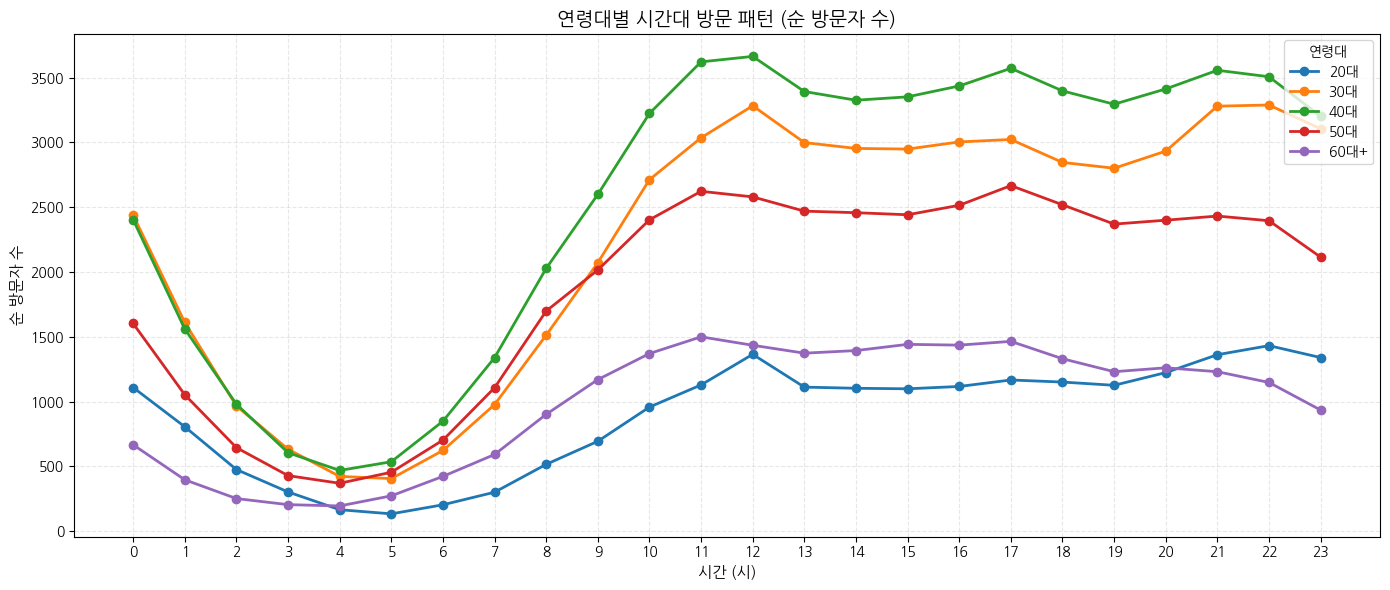


=== 연령대별 피크 시간대 (순 방문자) ===
20대: 22시 (순방문자 1,432명, 하루 총 21,394명)
30대: 22시 (순방문자 3,289명, 하루 총 53,879명)
40대: 12시 (순방문자 3,664명, 하루 총 61,332명)
50대: 17시 (순방문자 2,667명, 하루 총 44,470명)
60대+: 11시 (순방문자 1,500명, 하루 총 23,630명)


In [3]:
# 순 방문자 수 - 라인 플롯
plt.figure(figsize=(14, 6))

for age_group in target_groups:
    if age_group in heatmap_data.index:
        plt.plot(
            heatmap_data.columns, 
            heatmap_data.loc[age_group], 
            marker='o', 
            linewidth=2, 
            label=age_group,
            markersize=6
        )

plt.title("연령대별 시간대 방문 패턴 (순 방문자 수)", fontsize=14)
plt.xlabel("시간 (시)", fontsize=11)
plt.ylabel("순 방문자 수", fontsize=11)
plt.xticks(range(24))
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(title='연령대', loc='upper right')
plt.tight_layout()
plt.savefig("age_hour_lineplot_unique.png", dpi=150, bbox_inches='tight')
plt.show()

# 통계 요약
print("\n=== 연령대별 피크 시간대 (순 방문자) ===")
for age_group in target_groups:
    if age_group in heatmap_data.index:
        peak_hour = heatmap_data.loc[age_group].idxmax()
        peak_count = heatmap_data.loc[age_group].max()
        total_visits = heatmap_data.loc[age_group].sum()
        print(f"{age_group}: {int(peak_hour):02d}시 (순방문자 {int(peak_count):,}명, 하루 총 {int(total_visits):,}명)")

C:\Users\User\AppData\Local\Temp\ipykernel_10920\4114319755.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_traffic = visit_with_user.groupby(['age_group', 'hour']).size().reset_index(name='총클릭수')



=== 연령대별 시간대 총 트래픽 (모든 클릭 포함) ===
hour          0      1     2     3     4     5     6      7      8      9   \
age_group                                                                    
20대        10696   6354  3445  1610   778   549  1242   1620   2308   4136   
30대        25568  13470  6579  3462  2131  2041  3075   5018  10270  14901   
40대        35250  17504  8590  4612  2855  3056  5522   8827  17095  23716   
50대        28851  14487  7074  3869  2665  3253  5306  10794  20155  27776   
60대+        9672   4165  2151  1551  1459  2483  4068   6470  12162  16917   

hour       ...     14     15     16     17     18     19     20     21     22  \
age_group  ...                                                                  
20대        ...   7471   7158   7286   8305   8587   8719  11153  13753  14169   
30대        ...  27823  24336  24942  27407  27016  28587  35589  42146  45310   
40대        ...  39541  37491  40934  44099  41783  45186  55707  63389  64364   
50대        ..

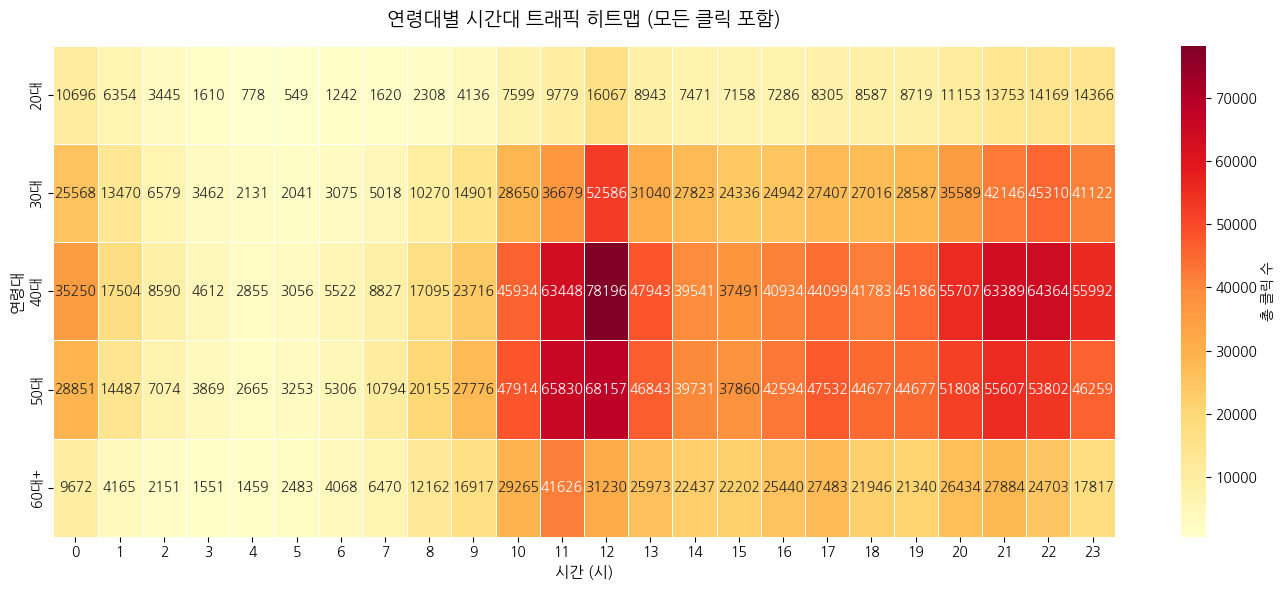


=== 연령대별 피크 시간대 (총 트래픽) ===
20대: 12시 (클릭 16,067건, 하루 총 176,093건)
30대: 12시 (클릭 52,586건, 하루 총 559,748건)
40대: 12시 (클릭 78,196건, 하루 총 851,034건)
50대: 12시 (클릭 68,157건, 하루 총 817,521건)
60대+: 11시 (클릭 41,626건, 하루 총 426,878건)

=== 순 방문자 대비 총 클릭 비율 (1인당 평균 클릭) ===
20대: 평균 7.46회/인, 최대 11.77회/인 (12시)
30대: 평균 9.21회/인, 최대 16.02회/인 (12시)
40대: 평균 12.30회/인, 최대 21.34회/인 (12시)
50대: 평균 16.30회/인, 최대 26.42회/인 (12시)
60대+: 평균 15.91회/인, 최대 27.75회/인 (11시)


In [4]:
# 히트맵(연령대 시간대별 클릭/ 총 트래픽 수): 모든 클릭 포함
# 중복 제거 없이 모든 클릭 집계

# 1) 연령대 × 시간대 집계 (총 클릭 수)
total_traffic = visit_with_user.groupby(['age_group', 'hour']).size().reset_index(name='총클릭수')

# 2) 피벗 테이블 생성 (히트맵용)
heatmap_traffic = total_traffic.pivot(index='age_group', columns='hour', values='총클릭수').fillna(0)

# target_groups 순서로 재정렬
target_groups = ['20대', '30대', '40대', '50대', '60대+']
heatmap_traffic = heatmap_traffic.reindex(target_groups)

print("\n=== 연령대별 시간대 총 트래픽 (모든 클릭 포함) ===")
print(heatmap_traffic)

# 3) 히트맵 시각화
plt.figure(figsize=(14, 6))
ax = sns.heatmap(
    heatmap_traffic, 
    cmap='YlOrRd',    # 빨강 계열 색상 (순 방문자와 구분)
    annot=True,      # 숫자 표시
    fmt='.0f',       # 정수로 표시
    cbar_kws={'label': '총 클릭 수'},
    linewidths=0.5,
    linecolor='white'
)

ax.set_title("연령대별 시간대 트래픽 히트맵 (모든 클릭 포함)", fontsize=14, pad=15)
ax.set_xlabel("시간 (시)", fontsize=11)
ax.set_ylabel("연령대", fontsize=11)
ax.set_xticklabels(range(24), rotation=0)

plt.tight_layout()
# plt.savefig("age_hour_heatmap_traffic.png", dpi=150, bbox_inches='tight')
plt.show()

# 4) 통계 요약
print("\n=== 연령대별 피크 시간대 (총 트래픽) ===")
for age_group in target_groups:
    if age_group in heatmap_traffic.index:
        peak_hour = heatmap_traffic.loc[age_group].idxmax()
        peak_count = heatmap_traffic.loc[age_group].max()
        total_clicks = heatmap_traffic.loc[age_group].sum()
        print(f"{age_group}: {int(peak_hour):02d}시 (클릭 {int(peak_count):,}건, 하루 총 {int(total_clicks):,}건)")

# 5) 두 히트맵 비교 통계 (순 방문자 vs 총 클릭)
print("\n=== 순 방문자 대비 총 클릭 비율 (1인당 평균 클릭) ===")
comparison = heatmap_traffic / heatmap_data  # 총 클릭 / 순 방문자
comparison = comparison.replace([np.inf, -np.inf], np.nan)  # 무한대 제거

for age_group in target_groups:
    if age_group in comparison.index:
        avg_clicks = comparison.loc[age_group].mean()
        max_clicks = comparison.loc[age_group].max()
        max_hour = comparison.loc[age_group].idxmax()
        print(f"{age_group}: 평균 {avg_clicks:.2f}회/인, 최대 {max_clicks:.2f}회/인 ({int(max_hour):02d}시)")


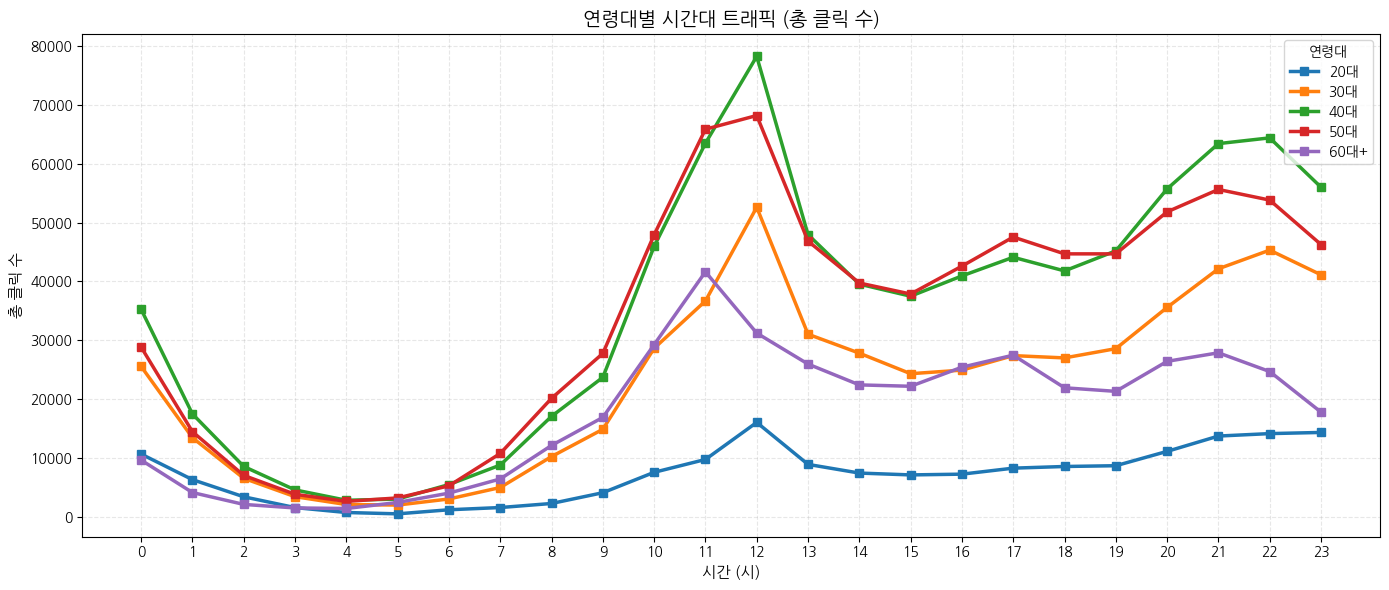


=== 연령대별 피크 시간대 (총 트래픽) ===
20대: 12시 (클릭 16,067건, 하루 총 176,093건)
30대: 12시 (클릭 52,586건, 하루 총 559,748건)
40대: 12시 (클릭 78,196건, 하루 총 851,034건)
50대: 12시 (클릭 68,157건, 하루 총 817,521건)
60대+: 11시 (클릭 41,626건, 하루 총 426,878건)

=== 순 방문자 대비 총 클릭 비율 (1인당 평균 클릭) ===
20대: 평균 7.46회/인, 최대 11.77회/인 (12시)
30대: 평균 9.21회/인, 최대 16.02회/인 (12시)
40대: 평균 12.30회/인, 최대 21.34회/인 (12시)
50대: 평균 16.30회/인, 최대 26.42회/인 (12시)
60대+: 평균 15.91회/인, 최대 27.75회/인 (11시)


In [5]:
# 총 트래픽 - 라인 플롯
plt.figure(figsize=(14, 6))

for age_group in target_groups:
    if age_group in heatmap_traffic.index:
        plt.plot(
            heatmap_traffic.columns, 
            heatmap_traffic.loc[age_group], 
            marker='s',  # 사각형 마커로 구분
            linewidth=2.5, 
            label=age_group,
            markersize=6
        )

plt.title("연령대별 시간대 트래픽 (총 클릭 수)", fontsize=14)
plt.xlabel("시간 (시)", fontsize=11)
plt.ylabel("총 클릭 수", fontsize=11)
plt.xticks(range(24))
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(title='연령대', loc='upper right')
plt.tight_layout()
plt.savefig("age_hour_lineplot_traffic.png", dpi=150, bbox_inches='tight')
plt.show()

# 통계 요약
print("\n=== 연령대별 피크 시간대 (총 트래픽) ===")
for age_group in target_groups:
    if age_group in heatmap_traffic.index:
        peak_hour = heatmap_traffic.loc[age_group].idxmax()
        peak_count = heatmap_traffic.loc[age_group].max()
        total_clicks = heatmap_traffic.loc[age_group].sum()
        print(f"{age_group}: {int(peak_hour):02d}시 (클릭 {int(peak_count):,}건, 하루 총 {int(total_clicks):,}건)")

# 1인당 평균 클릭 비교
print("\n=== 순 방문자 대비 총 클릭 비율 (1인당 평균 클릭) ===")
comparison = heatmap_traffic / heatmap_data
comparison = comparison.replace([np.inf, -np.inf], np.nan)

for age_group in target_groups:
    if age_group in comparison.index:
        avg_clicks = comparison.loc[age_group].mean()
        max_clicks = comparison.loc[age_group].max()
        max_hour = comparison.loc[age_group].idxmax()
        print(f"{age_group}: 평균 {avg_clicks:.2f}회/인, 최대 {max_clicks:.2f}회/인 ({int(max_hour):02d}시)")

거래 데이터: 168,996건
쿠폰 데이터: 19,413건

장르 정보가 있는 거래: 168,996건
고유 장르 수: 13개

장르별 거래 건수:
GENRE_NAME_EN
Delivery                59654
Food & Dining           37293
Other Coupons           25504
Hotels & Ryokan         15440
Gift Cards              10532
Leisure                  6654
Hair Salon               3876
Relaxation & Massage     3702
Aesthetic Spa            2313
Nails & Eyelashes        2091
Lessons & Classes        1585
Health & Medical          198
Beauty                    154
Name: count, dtype: int64

=== 장르별 시간대 거래 패턴 ===
hour                      0       1      2      3      4      5      6   \
GENRE_NAME_EN                                                             
Aesthetic Spa          136.0    88.0   38.0   19.0   15.0    6.0   23.0   
Beauty                   9.0     0.0    5.0    3.0    0.0    0.0    1.0   
Delivery              2484.0  1387.0  719.0  398.0  273.0  280.0  438.0   
Food & Dining         1525.0   866.0  420.0  218.0  126.0  154.0  217.0   
Gift Cards     

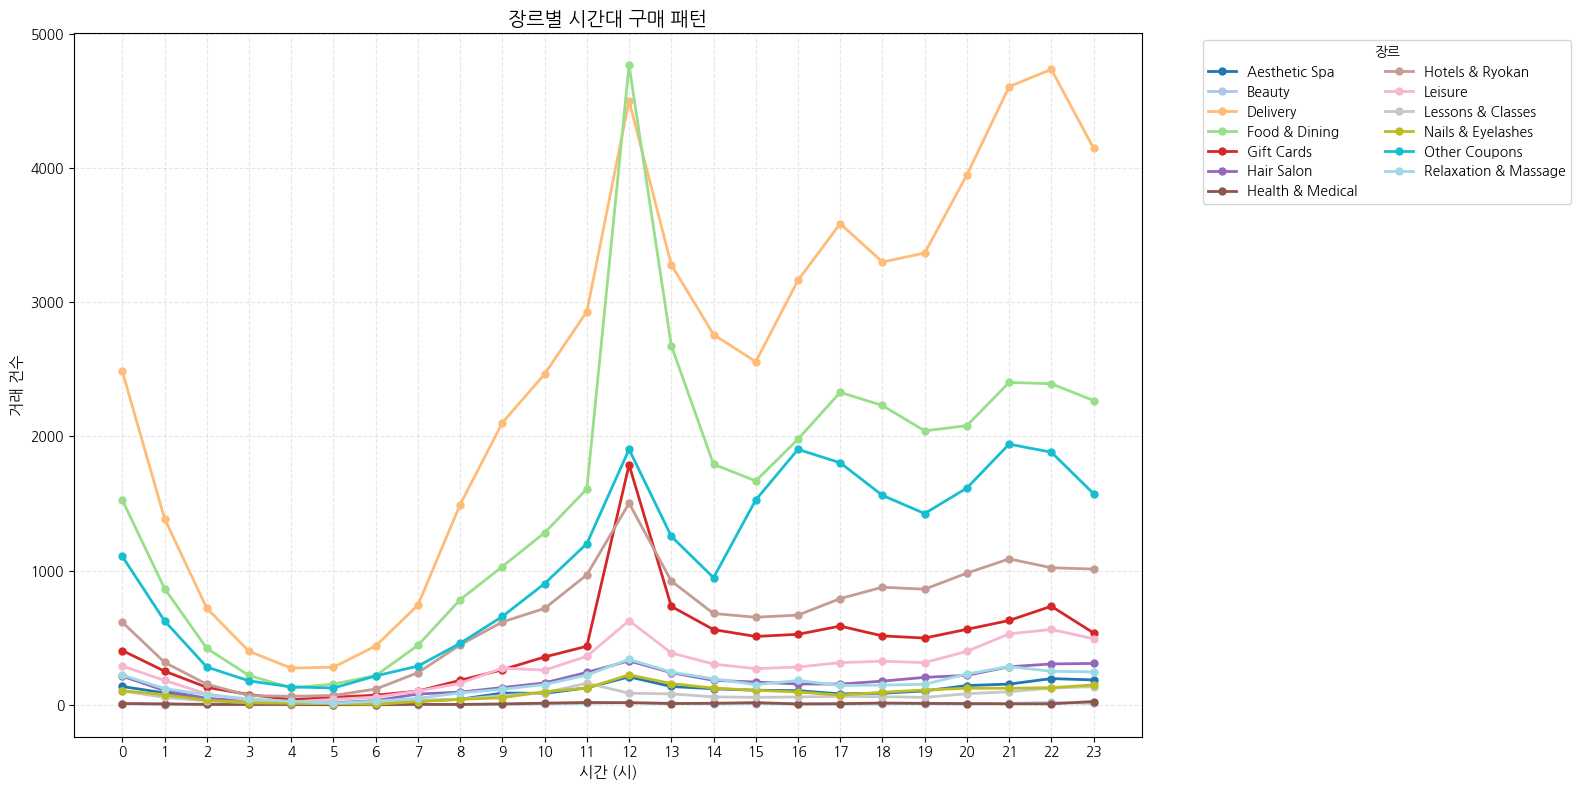

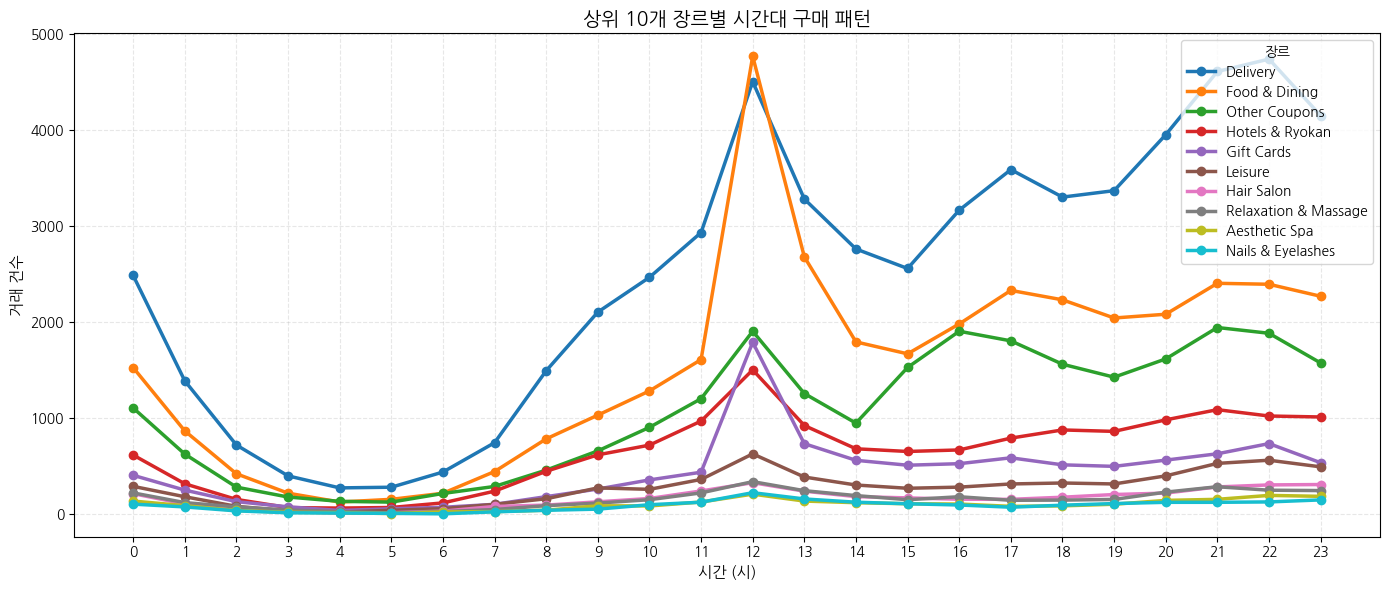


=== 상위 장르별 피크 시간대 ===
Delivery                      : 22시 (거래 4,735건, 총 59,654건)
Food & Dining                 : 12시 (거래 4,765건, 총 37,293건)
Other Coupons                 : 21시 (거래 1,942건, 총 25,504건)
Hotels & Ryokan               : 12시 (거래 1,501건, 총 15,440건)
Gift Cards                    : 12시 (거래 1,788건, 총 10,532건)
Leisure                       : 12시 (거래 627건, 총 6,654건)
Hair Salon                    : 12시 (거래 327건, 총 3,876건)
Relaxation & Massage          : 12시 (거래 338건, 총 3,702건)
Aesthetic Spa                 : 12시 (거래 208건, 총 2,313건)
Nails & Eyelashes             : 12시 (거래 223건, 총 2,091건)


In [4]:
# 장르별 시간대 구매 패턴 분석

# 1) 데이터 로드 및 병합
trans_df = pd.read_csv(TRANS_FILE, parse_dates=['PURCHASED_DATE'])
coupon_list = pd.read_csv(COUPON_FILE)

print(f"거래 데이터: {len(trans_df):,}건")
print(f"쿠폰 데이터: {len(coupon_list):,}건")

# 2) 거래 데이터와 쿠폰 정보 병합 (장르 정보 추가)
trans_with_genre = trans_df.merge(
    coupon_list[['COUPON_ID_hash', 'GENRE_NAME_EN', 'DISCOUNT_PRICE', 'large_area_name']], 
    on='COUPON_ID_hash', 
    how='left'
)

# 3) 시간(hour) 추출
trans_with_genre['hour'] = trans_with_genre['PURCHASED_DATE'].dt.hour

# 4) 결측치 제거 (장르 정보 없는 경우)
trans_with_genre = trans_with_genre.dropna(subset=['GENRE_NAME_EN'])

print(f"\n장르 정보가 있는 거래: {len(trans_with_genre):,}건")
print(f"고유 장르 수: {trans_with_genre['GENRE_NAME_EN'].nunique()}개")
print(f"\n장르별 거래 건수:")
print(trans_with_genre['GENRE_NAME_EN'].value_counts())

# 5) 장르 × 시간대 집계
genre_hourly = trans_with_genre.groupby(['GENRE_NAME_EN', 'hour']).size().reset_index(name='거래건수')

# 6) 피벗 테이블 생성 (확인용)
genre_hour_pivot = genre_hourly.pivot(index='GENRE_NAME_EN', columns='hour', values='거래건수').fillna(0)

print("\n=== 장르별 시간대 거래 패턴 ===")
print(genre_hour_pivot)

# 7) 라인 플롯 시각화 (모든 장르)
plt.figure(figsize=(16, 8))

# 색상 팔레트 (많은 장르를 위해)
genres = sorted(trans_with_genre['GENRE_NAME_EN'].unique())
colors = plt.cm.tab20(np.linspace(0, 1, len(genres)))

for i, genre in enumerate(genres):
    genre_data = genre_hour_pivot.loc[genre] if genre in genre_hour_pivot.index else pd.Series()
    if len(genre_data) > 0:
        plt.plot(
            genre_data.index, 
            genre_data.values, 
            marker='o', 
            linewidth=2, 
            label=genre,
            markersize=5,
            color=colors[i]
        )

plt.title("장르별 시간대 구매 패턴", fontsize=14)
plt.xlabel("시간 (시)", fontsize=11)
plt.ylabel("거래 건수", fontsize=11)
plt.xticks(range(24))
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(title='장르', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.tight_layout()
plt.savefig("genre_hour_lineplot_all.png", dpi=150, bbox_inches='tight')
plt.show()

# 8) 상위 장르만 선택 (가독성 향상)
top_genres = trans_with_genre['GENRE_NAME_EN'].value_counts().head(10).index.tolist()

plt.figure(figsize=(14, 6))

for genre in top_genres:
    if genre in genre_hour_pivot.index:
        plt.plot(
            genre_hour_pivot.columns, 
            genre_hour_pivot.loc[genre], 
            marker='o', 
            linewidth=2.5, 
            label=genre,
            markersize=6
        )

plt.title("상위 10개 장르별 시간대 구매 패턴", fontsize=14)
plt.xlabel("시간 (시)", fontsize=11)
plt.ylabel("거래 건수", fontsize=11)
plt.xticks(range(24))
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(title='장르', loc='upper right')
plt.tight_layout()
plt.savefig("genre_hour_lineplot_top10.png", dpi=150, bbox_inches='tight')
plt.show()

# 9) 장르별 피크 시간대 통계
print("\n=== 상위 장르별 피크 시간대 ===")
for genre in top_genres:
    if genre in genre_hour_pivot.index:
        peak_hour = genre_hour_pivot.loc[genre].idxmax()
        peak_count = genre_hour_pivot.loc[genre].max()
        total_purchases = genre_hour_pivot.loc[genre].sum()
        print(f"{genre[:30]:30s}: {int(peak_hour):02d}시 (거래 {int(peak_count):,}건, 총 {int(total_purchases):,}건)")

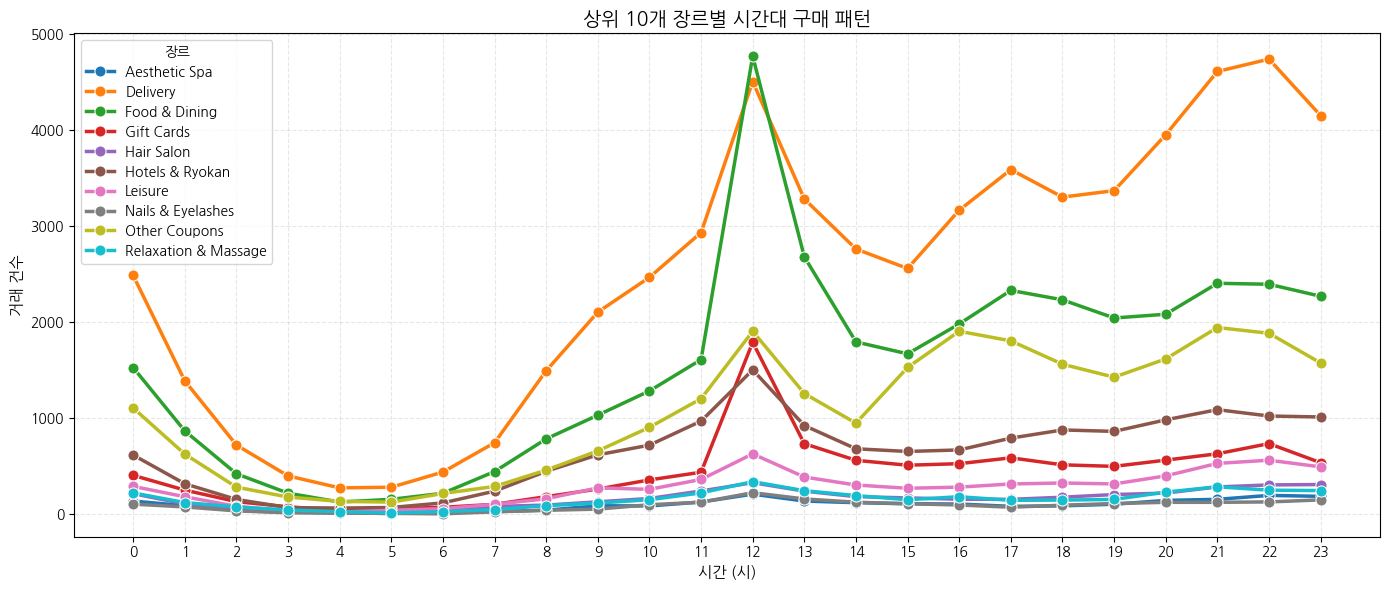

In [9]:
# Seaborn 스타일 - 상위 장르만
import seaborn as sns

# 상위 10개 장르 필터링
genre_hourly_top = genre_hourly[genre_hourly['GENRE_NAME_EN'].isin(top_genres)]

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=genre_hourly_top,
    x='hour',
    y='거래건수',
    hue='GENRE_NAME_EN',
    marker='o',
    linewidth=2.5,
    markersize=8
)

plt.title("상위 10개 장르별 시간대 구매 패턴", fontsize=14)
plt.xlabel("시간 (시)", fontsize=11)
plt.ylabel("거래 건수", fontsize=11)
plt.xticks(range(24))
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(title='장르', loc='upper left')
plt.tight_layout()
plt.savefig("genre_hour_seaborn.png", dpi=150, bbox_inches='tight')
plt.show()